In [1]:
#import pygeostat as gs
#import spatialcluster as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data = pd.read_excel('assay_csn.xlsx')
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [3]:
data.columns

Index(['ln+_line_number_(readonly)+', 'rn+_relative_number_(readonly)+',
       'xb+_begin_of_sample', 'yb+_begin_of_sample', 'zb+_begin_of_sample',
       'xe+_end_of_sample', 'ye+_end_of_sample', 'ze+_end_of_sample', 'bhid',
       'from', 'to', 'x', 'y', 'z', 'al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl',
       'mn_gl', 'p_gl', 'sio2_gl', 'tio2_gl', 'ppc_gl', 're_gt63c', 'ibs',
       'hba', 'ibg', 'ibr', 'ibm', 'hcp', 'ics', 'icr', 'icg', 'icm', 'icc',
       'cp', 'sn', 'eng', 'lito', 'soma'],
      dtype='object')

In [4]:
data[0]

KeyError: 0

In [4]:
print(f'Número total de amostras: {data.shape[0]}')

Número total de amostras: 6500


# Updating Encoded Lithologies & Checking Lithologies w/ Geochemistry Tree

In [5]:
update = {0: 'IS', 1: 'HM', 2:'IG', 3:'IR', 4:'IM', 5:'HM', 6:'IS', 7:'IR', 8:'IG', 9:'IM', 10:'IC'}

update = data['lito'].map(update)
data['lito'] = update

conditions = [
    (data['fe_gl'] >= 64),
    (data['fe_gl'] >= 58),
    (data['cao_gl'] >= 1) & (data['fe_gl'] >= 20),
    (data['mn_gl'] >= 1),
    (data['al2o3_gl'] >= 1) & (data['ppc_gl'] >= 2.5)]


values = ['HM', 'IR', 'IC', 'IM', 'IG']

data['lito_eval'] = np.select(conditions, values)
data['lito_eval'].replace('0', 'IS', inplace=True)


data['evaluation'] = np.where(data['lito_eval'] == data['lito'], True, False)

data['evaluation'].value_counts()
#data.to_csv('assay_csn_lito')



True     5759
False     741
Name: evaluation, dtype: int64

# Declaring project variables

In [6]:
allvar = ['al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl', 'sio2_gl', 'tio2_gl', 're_gt63c']
target_var = ['al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl', 'sio2_gl']
holes = ['bhid']
cat_var = ['lito', 'lito_eval']
coord = ['x', 'y', 'z']
assay = ['from', 'to']

Text(0, 0.5, 'Frequency')

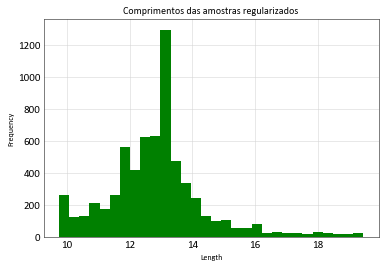

In [16]:
data['length'] = data['to'] - data['from']

data['length'].hist(color='green', bins=30)

plt.title('Comprimentos das amostras regularizados')
plt.xlabel('Length')

plt.ylabel('Frequency')

In [8]:
data0 = data.dropna(subset=target_var)

data0.shape[0]

3011

In [10]:
data0[allvar].isnull().sum()

al2o3_gl      0
cao_gl        0
fe_gl         0
mgo_gl        0
mn_gl         0
p_gl          0
ppc_gl        0
sio2_gl       0
tio2_gl       0
re_gt63c    542
dtype: int64

In [ ]:
data0.to_csv('data.csv')

In [8]:
data = data.filter(items=holes+assay+coord+allvar+cat_var)

#dataexp = data.filter(items=holes+assay+coord+var+cat_var).dropna().to_csv('data1.csv')

data.head(10)

,bhid,from,to,x,y,z,al2o3_gl,cao_gl,fe_gl,mgo_gl,mn_gl,p_gl,ppc_gl,sio2_gl,tio2_gl,re_gt63c,lito,lito_eval
0,CNFDC14001,16.92,28.70,612565.19,7738514.56,1301.43,2.740,0.030,61.000,0.05,0.100,0.082,0.030,9.080,0.280,7.690,IS,IR
1,CNFDC14001,28.70,40.48,612560.42,7738513.30,1290.74,2.570,0.030,61.179,0.05,0.082,0.061,1.249,7.789,0.172,4.355,IS,IR
2,CNFDC14001,40.48,52.26,612555.65,7738512.04,1280.04,3.010,0.030,61.676,0.05,0.072,0.050,1.374,6.205,0.223,2.511,IS,IR
3,CNFDC14001,65.75,75.58,612545.82,7738509.44,1257.98,1.720,0.040,64.900,0.05,0.040,0.053,1.100,2.860,0.130,17.890,HM,HM
4,CNFDC14001,75.58,85.41,612541.84,7738508.39,1249.05,1.166,0.050,66.187,0.05,0.426,0.071,1.080,2.721,0.061,24.076,HM,HM
5,CNFDC14001,85.41,101.60,612536.57,7738507.00,1237.23,2.575,0.055,58.748,0.10,4.341,0.347,4.785,2.830,0.160,NaN,IG,IR
6,CNFDC14002,0.00,13.70,612562.07,7738470.67,1316.93,3.063,0.034,41.786,0.05,0.031,0.030,1.378,35.679,0.149,2.136,IS,IS
7,CNFDC14002,13.70,27.40,612556.87,7738469.18,1304.34,3.735,0.040,36.770,0.05,0.050,0.049,1.930,40.794,0.183,NaN,IS,IS
8,CNFDC14002,27.40,41.10,612551.67,7738467.70,1291.75,2.406,0.035,44.351,0.05,0.050,0.050,1.506,31.505,0.130,NaN,IS,IS
9,CNFDC14002,41.10,54.80,612546.47,7738466.21,1279.17,2.857,0.030,53.868,0.05,0.069,0.160,2.213,17.721,0.291,NaN,IS,IS


In [9]:
ddh = np.unique(data['bhid'])
len(ddh)

705

In [10]:
data[allvar].describe().round(2)

,al2o3_gl,cao_gl,fe_gl,mgo_gl,mn_gl,p_gl,ppc_gl,sio2_gl,tio2_gl,re_gt63c
count,6465.00,3022.00,6500.00,3020.00,5733.00,5763.00,5630.00,6500.00,3022.00,4598.00
mean,1.26,0.34,47.15,0.27,0.57,0.06,2.39,27.85,0.05,37.60
std,1.30,1.79,12.95,1.02,1.35,0.07,2.57,18.70,0.11,23.58
min,0.05,0.00,16.46,0.00,0.00,0.00,-0.48,0.16,0.00,0.19
25%,0.46,0.01,36.73,0.05,0.06,0.03,1.02,5.93,0.01,18.38
50%,0.84,0.02,43.52,0.05,0.14,0.04,1.84,33.08,0.02,32.20
75%,1.60,0.04,60.29,0.10,0.42,0.07,2.91,44.14,0.05,54.92
max,18.04,20.20,69.78,14.00,20.02,3.60,35.23,69.44,2.56,96.76


In [11]:
litotypes = np.unique(data[cat_var])
print(litotypes)

['HM' 'IC' 'IG' 'IM' 'IR' 'IS']


In [12]:
for vars in allvar:
    null_counts = data[vars].isnull().sum()
    percent = (null_counts/len(data[vars]))*100
    print(f'{vars} has {null_counts} NaN Values = {percent.round(2)}% of all samples')

al2o3_gl has 35 NaN Values = 0.54% of all samples
cao_gl has 3478 NaN Values = 53.51% of all samples
fe_gl has 0 NaN Values = 0.0% of all samples
mgo_gl has 3480 NaN Values = 53.54% of all samples
mn_gl has 767 NaN Values = 11.8% of all samples
p_gl has 737 NaN Values = 11.34% of all samples
ppc_gl has 870 NaN Values = 13.38% of all samples
sio2_gl has 0 NaN Values = 0.0% of all samples
tio2_gl has 3478 NaN Values = 53.51% of all samples
re_gt63c has 1902 NaN Values = 29.26% of all samples


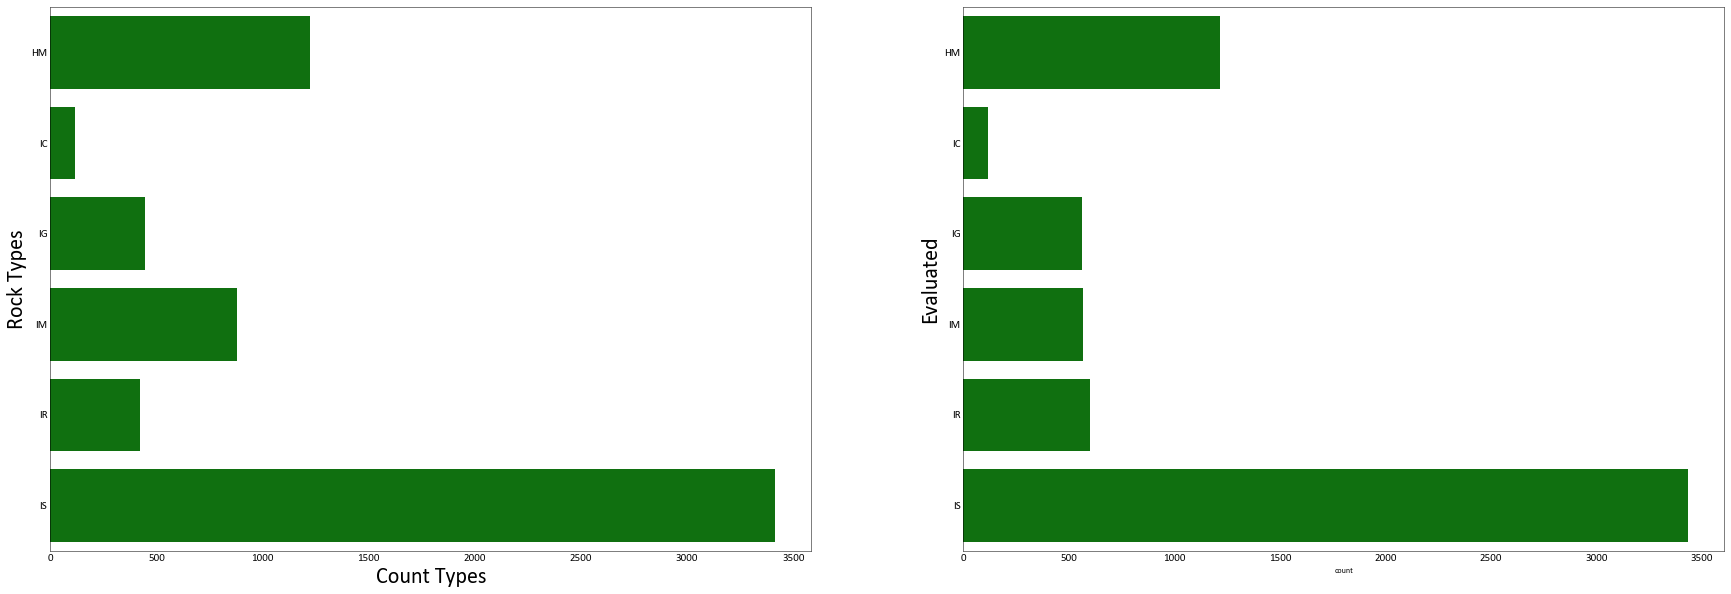

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
    
sns.countplot(y=data['lito'].sort_values(ascending=True), color='green', ax=ax[0])
sns.countplot(y=data['lito_eval'].sort_values(ascending=True), color='green', ax=ax[1])
fig.set_size_inches(30,10)
ax[0].set_ylabel('Rock Types', fontdict={'size':22})
ax[0].set_xlabel('Count Types', fontdict={'size':22})
ax[1].set_ylabel('Evaluated', fontdict={'size':22})
plt.show()

Text(0.5, 0.92, 'Perspective Plot')

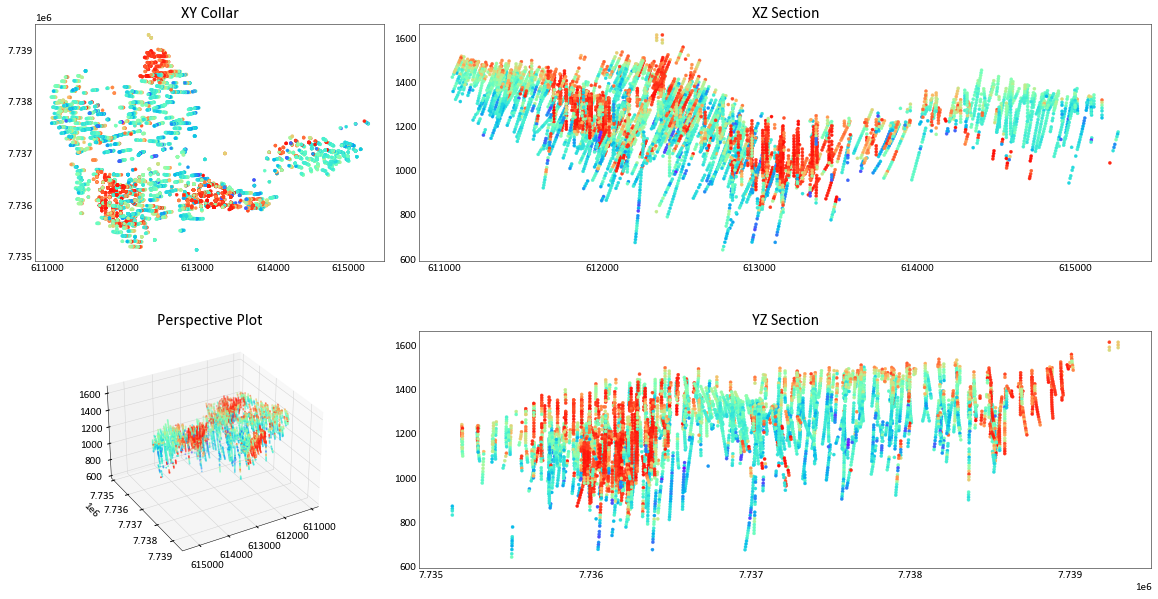

In [22]:
# melhorar plot 

fig = plt.figure(figsize=(20,10))


grid = plt.GridSpec(2,3, wspace=0.1, hspace=0.3)

ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1:])
ax3 = fig.add_subplot(grid[1, 1:])
ax4 = fig.add_subplot(grid[1, :1], projection='3d');

ax1.scatter(data['x'], data['y'], c=data['fe_gl'], cmap='rainbow', s=10, label=data['fe_gl'])
ax4.scatter(data['x'], data['y'], data['z'], c=data['fe_gl'], s=2, cmap='rainbow', )
ax2.scatter(data['x'], data['z'], c=data['fe_gl'], cmap='rainbow', s=10)
ax3.scatter(data['y'], data['z'], c=data['fe_gl'], cmap='rainbow', s=10)


ax4.set_box_aspect((np.ptp(data['x']), np.ptp(data['y']), 3*np.ptp(data['z'])))
ax4.view_init(30,60)

ax1.set_title('XY Collar', fontsize='16')
ax2.set_title('XZ Section', fontsize='16')
ax3.set_title('YZ Section', fontsize='16')
ax4.set_title('Perspective Plot', fontsize='16')

plt.scatter()


#fig.suptitle('Location Plots', fontsize=20)

#fig.colorbar(trid_plot, shrink = 0.5, aspect = 5 )

#data.plot.scatter(x='X', y='Z', c='AA1', figsize=(18,2), cmap='rainbow')
#data.plot.scatter(x='Y', y='Z', c='AA1', figsize=(18,2), cmap='rainbow')




#gs.location_plot(data, var='fe_gl', orient='xy', x='x', y='y', figsize=(10,10), s=30, grid=True, title='Location Plot')


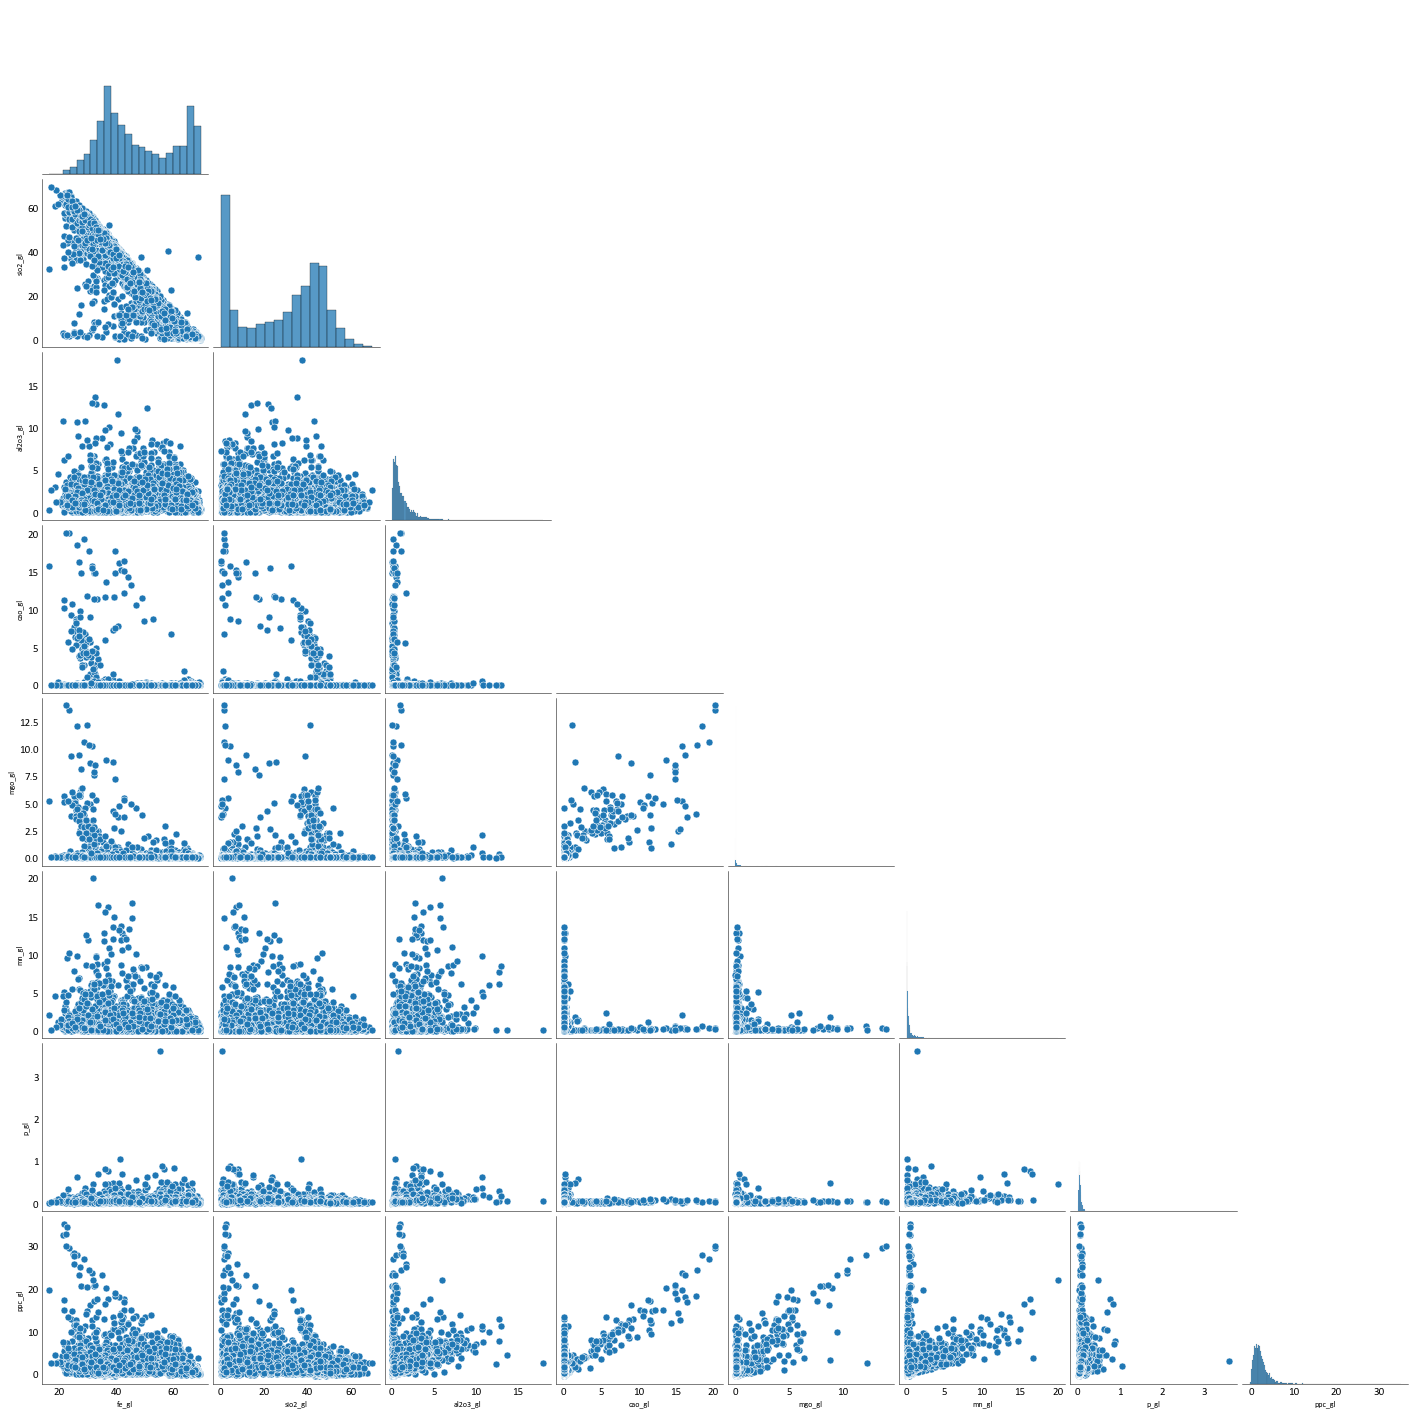

In [48]:
varlist = [ 'fe_gl','sio2_gl', 'al2o3_gl', 'cao_gl','mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl'] 
dict_colors1 = {'HM':'red', 'IR':'orangered', 'IC':'mediumvioletred', 'IM':'aqua', 'IG':'lime', 'IS':'gold'}
sns.pairplot(data[varlist], diag_kind='hist', corner=True)

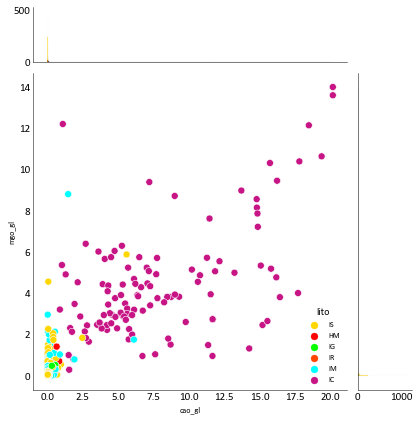

In [34]:
dict_colors1 = {'HM':'red', 'IR':'orangered', 'IC':'mediumvioletred', 'IM':'aqua', 'IG':'lime', 'IS':'gold'}

g = sns.JointGrid(x=data['cao_gl'], y=data['mgo_gl'], data=data, hue=data['lito'], palette= dict_colors1,
                marginal_ticks=True)

g.plot_joint(sns.scatterplot)
g.plot_marginals( sns.histplot, bin=100)


Text(0.5, 1.0, 'Matriz de Correlação')

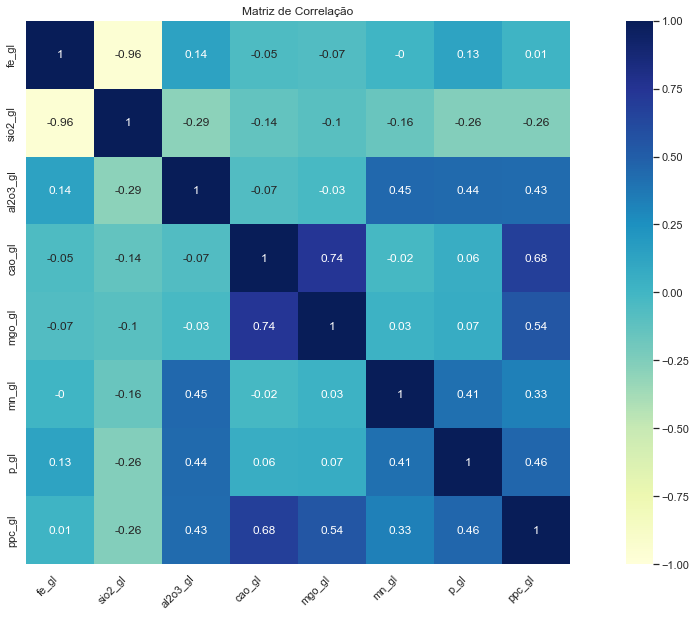

In [81]:
varlist = [ 'fe_gl','sio2_gl', 'al2o3_gl', 'cao_gl','mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl'] 
corr = data[varlist].corr().round(2)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='YlGnBu', square=True, annot=True, )
sns.set(rc={'figure.figsize':(20,10)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Matriz de Correlação')
#plt.savefig('corrmat_m100.png')

In [57]:
varlist = [ 'fe_gl','sio2_gl', 'al2o3_gl', 'cao_gl','mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl'] 

data0 = data.filter(items=varlist).dropna()

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Tdata = sc.fit_transform(data0[varlist])


In [2]:
data = data.dropna()
data.to_csv('data.csv')
data['lito'].value_counts()

NameError: name 'data' is not defined

In [29]:
data[varlist].describe().round(2)

,al2o3_gl,cao_gl,fe_gl,mgo_gl,mn_gl,p_gl,ppc_gl,sio2_gl
count,6465.00,3022.00,6500.00,3020.00,5733.00,5763.00,5630.00,6500.00
mean,1.26,0.34,47.15,0.27,0.57,0.06,2.39,27.85
std,1.30,1.79,12.95,1.02,1.35,0.07,2.57,18.70
min,0.05,0.00,16.46,0.00,0.00,0.00,-0.48,0.16
25%,0.46,0.01,36.73,0.05,0.06,0.03,1.02,5.93
50%,0.84,0.02,43.52,0.05,0.14,0.04,1.84,33.08
75%,1.60,0.04,60.29,0.10,0.42,0.07,2.91,44.14
max,18.04,20.20,69.78,14.00,20.02,3.60,35.23,69.44


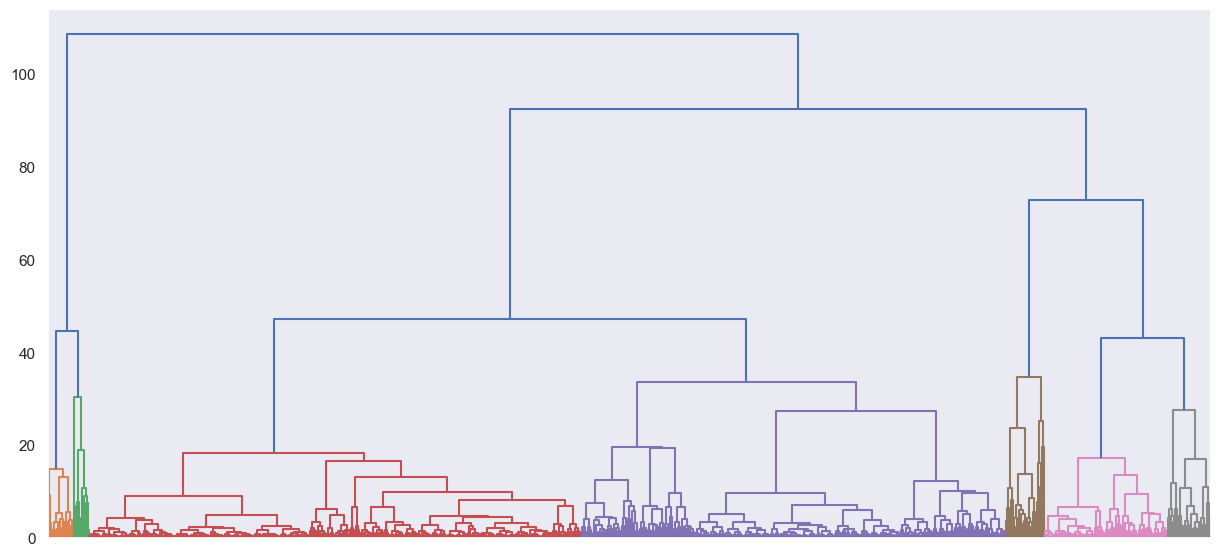

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(Tdata, method = "ward", metric = 'euclidean')
plt.figure(figsize=(15,7), dpi=100)
ddg = dendrogram(Z, no_labels=True, truncate_mode=None, color_threshold=40)
plt.grid()
#plt.savefig('figs/dendo.png', bbox_inches='tight', facecolor='white')

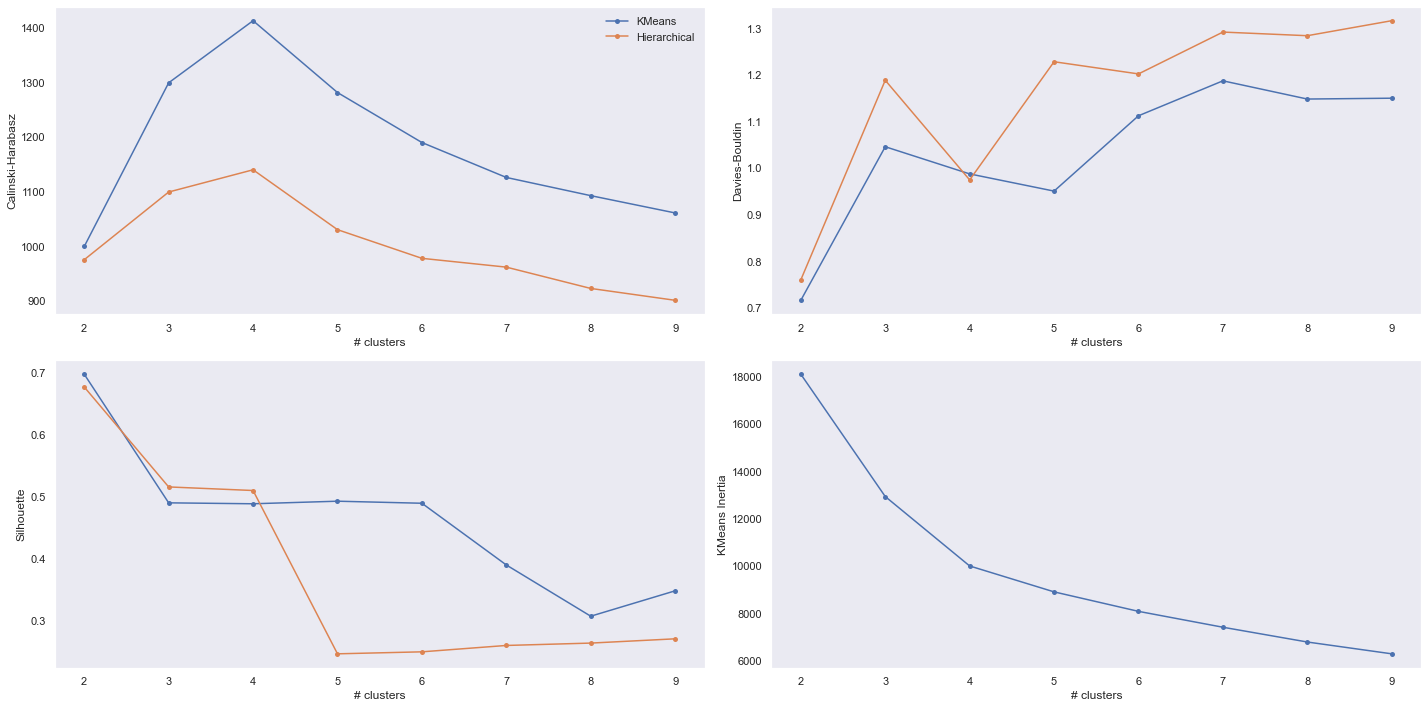

In [36]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

ch_scores_km = [] 
db_scores_km = [] 
sl_scores_km = [] 
inertia_km = []

ch_scores_h = [] 
db_scores_h = [] 
sl_scores_h = [] 
inertia_h = []

ch_scores_ds = []
sl_scores_ds = []
db_scores_ds = []
inertia_h = []

for i in range(2,10): 
    cluster = KMeans(n_clusters=i, algorithm='full')
    cluster.fit(Tdata) 
    labels = cluster.labels_
    ch_scores_km.append(calinski_harabasz_score(Tdata, labels))
    sl_scores_km.append(silhouette_score(Tdata, labels))
    db_scores_km.append(davies_bouldin_score(Tdata, labels))
    inertia_km.append(cluster.inertia_)
        
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cluster.fit(Tdata)  
    labels = cluster.labels_
    ch_scores_h.append(calinski_harabasz_score(Tdata, labels))
    sl_scores_h.append(silhouette_score(Tdata, labels))
    db_scores_h.append(davies_bouldin_score(Tdata, labels))

    #mvdata = Tdata
    #locations = data[coord].values   
    #dss = sp.DSSEnsemble(mvdata, locations, nreal=100, nnears=30, numtake=20, rseed=100, searchparams=[0,0,0,500,500,100])
    #dss.fit(i)
    #labels = dss.predict(i, method='spec')
    #ch_scores_ds.append(calinski_harabasz_score(Tdata, labels))
    #sl_scores_ds.append(silhouette_score(Tdata, labels))
    #db_scores_ds.append(davies_bouldin_score(Tdata, labels))


x = [i for i in range(2,10)]
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0][0].set_ylabel('Calinski-Harabasz')
axs[0][0].set_xlabel('# clusters')
axs[0][0].set_xticks(x)
axs[0][0].plot(x, ch_scores_km, label='KMeans', marker='o', markersize=5)
axs[0][0].plot(x, ch_scores_h, label='Hierarchical', marker='o', markersize=5)
#axs[0][0].plot(x, ch_scores_ds, label='Dual-Spatial', marker='o', markersize=5)
axs[0][0].grid()
axs[0][0].legend()

axs[0][1].set_ylabel('Davies-Bouldin')
axs[0][1].set_xlabel('# clusters')
axs[0][1].set_xticks(x)
axs[0][1].plot(x, db_scores_km, label='KMeans', marker='o', markersize=5)
axs[0][1].plot(x, db_scores_h, label='Hierarchical', marker='o', markersize=5)
#axs[0][1].plot(x, ch_scores_ds, label='Dual Spatial', marker='o', markersize=5)
axs[0][1].grid()


axs[1][0].set_ylabel('Silhouette')
axs[1][0].set_xlabel('# clusters')
axs[1][0].set_xticks(x)
axs[1][0].plot(x, sl_scores_km, label='KMeans', marker='o', markersize=5)
axs[1][0].plot(x, sl_scores_h, label='Hierarchical', marker='o', markersize=5)
#axs[1][0].plot(x, ch_scores_ds, label='Dual Spatial', marker='o', markersize=5)
axs[1][0].grid()


axs[1][1].set_ylabel('KMeans Inertia')
axs[1][1].set_xlabel('# clusters')
axs[1][1].set_xticks(x)
axs[1][1].plot(x, inertia_km, label='KMeans', marker='o', markersize=5)
axs[1][1].grid()

plt.tight_layout()


In [45]:
maxvars=3
kmin=2
kmax=8
kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
# We also define a cols variables containing a list of all features:
cols=data0.columns
# We also set a list and a dictionary to store the silhouette values
# for each number of clusters tested so we can choose the k value
# maximising the silhouette score, with its corresponding features
results_for_each_k=[]
vars_for_each_k={}

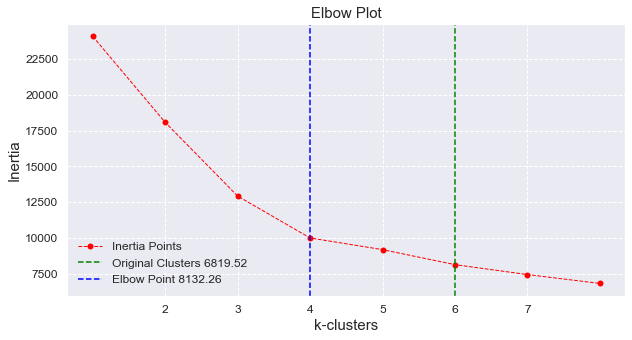

In [45]:
def inertia_plot(df, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    x = [i for i in range(2,8)]
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df)
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(10, 5))
    
    plt.plot(range(1, n_clusters+1), inertia_values, color='red', marker='o', markersize=6, linewidth = 1, linestyle='dashed', label='Inertia Points')
    plt.axvline(x=6, color='green', linestyle='dashed', label='Original Clusters {}'.format(round(inertia_values[7],2)))
    plt.axvline(x=4, color='blue', linestyle='dashed', label='Elbow Point {}'.format(round(inertia_values[5],2)))
    
    plt.legend(loc='lower left',fontsize=12)


    plt.xlabel('k-clusters', fontsize=15)
    plt.ylabel('Inertia', fontsize=15)
    plt.title('Elbow Plot', fontsize=15 )
    plt.xticks(x)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.grid(visible=True, linestyle='dashed', linewidth=1)
    plt.show()

inertia_plot(Tdata, init='random')

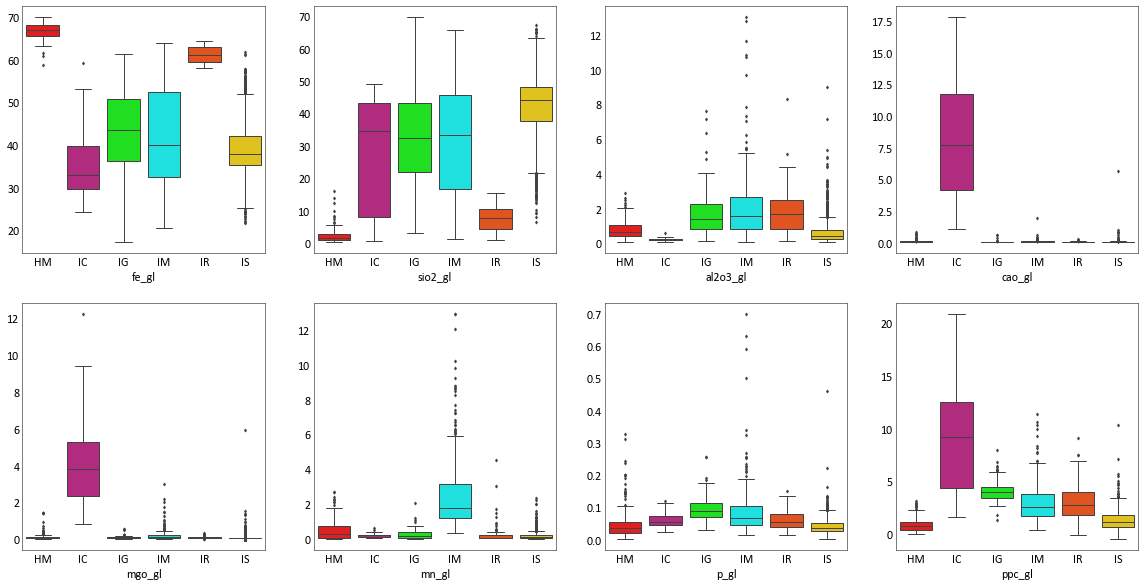

In [76]:
dict_colors1 = {'HM':'red', 'IR':'orangered', 'IC':'mediumvioletred', 'IM':'aqua', 'IG':'lime', 'IS':'gold'}

fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()
iax = 0
for ax, var, title in zip(axes, varlist, varlist):
    #ax.boxplot()
    sns.boxplot(y=data[var], x=data['lito'].sort_values(ascending=True), ax=ax, palette=dict_colors1, fliersize=2, linewidth=1)
    ax.set_ylabel('')
    ax.set_xlabel(var, size=12)
    #ax.set
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
